In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, \
'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, \
'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, \
'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, \
'id':str, 'sqft_lot':int, 'view':int}
data_house = pd.read_csv('C://Users//xyzs//Machine Learning//Week 1//kc_house_train_data.csv',dtype = dtype_dict)
data_house1 = pd.read_csv('C://Users//xyzs//Machine Learning//Week 1//kc_house_test_data.csv',dtype = dtype_dict)


sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    RSS_R = (output - np.dot(input_feature, slope) - intercept)
    RSS_L = np.transpose(RSS_R)
    RSS = np.dot(RSS_L,RSS_R)
    return(RSS)

In [13]:
l2_small_penalty = 1.5e-5

In [14]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [15]:
from sklearn import linear_model
import numpy as np

poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
result = model.fit(poly15_data, sales['price'])
result.coef_

array([  1.24873306e+02,  -4.77376011e-02,   3.01446238e-05,
        -2.44419942e-09,  -1.94153675e-13,   8.54085685e-18,
         1.51142121e-21,   8.27979094e-26,   6.52603100e-31,
        -3.27895017e-34,  -3.87962315e-38,  -2.72437650e-42,
        -1.07790800e-46,   3.78242694e-51,   1.39790296e-54])

In [16]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [17]:
l2_small_penalty=1e-9
l2_large_penalty=1.23e2
for i in range(1,5):
    set_x = eval('set_' + str(i))
    poly15_data = polynomial_dataframe(set_x['sqft_living'], 15) # use equivalent of `polynomial_sframe`
    model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    result = model.fit(poly15_data, set_x['price'])
    print(result.coef_[0])
    

2.32806802958
2.09756902778
2.28906258119
2.08596194092


In [18]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [19]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print (i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


In [20]:
#train_valid_shuffled[0:10] # select rows 0 to 9
#start = (n*i)//10
#end = (n*(i+1))//10
#train_valid_shuffled[start:end+1]


In [21]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    k = 10 # 10-fold cross-validation
    avg_valid_error = 0
    for i in range(k):
        start = (n*i)//k
        end = (n*(i+1))//k-1
        data_valid = data[start:end+1]
        data_train = data[0:start].append(data[end+1:n])
        poly15_data = polynomial_dataframe(data_train['sqft_living'], 15) # use equivalent of `polynomial_sframe`
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        result = model.fit(poly15_data, data_train['price'])
        poly15_valid_data = polynomial_dataframe(data_valid['sqft_living'],15)
        avg_valid_error += get_residual_sum_of_squares(poly15_valid_data, data_valid['price'], result.intercept_,result.coef_)
    avg_valid_error = avg_valid_error/10
    print(result.intercept_)
    print(avg_valid_error)
    print(l2_penalty)
    return avg_valid_error

In [57]:
l2_penalty = np.logspace(3, 9, num=13)
k = 10
data = train_valid_shuffled
output = 1
for i in range(13):
    k_fold_cross_validation(k, l2_penalty[i], data, output)
    print(l2_penalty[i])
    print(i)

537954.868189
2.64977361037e+14
1000.0
1000.0
0
538612.921296
2.65692935858e+14
3162.27766017
3162.27766017
1
538821.682334
2.65924368957e+14
10000.0
10000.0
2
538887.765405
2.65998081509e+14
31622.7766017
31622.7766017
3
538908.669423
2.66021444554e+14
100000.0
100000.0
4
538915.280526
2.66028837919e+14
316227.766017
316227.766017
5
538917.371208
2.66031176438e+14
1000000.0
1000000.0
6
538918.032346
2.66031915997e+14
3162277.66017
3162277.66017
7
538918.241417
2.66032149871e+14
10000000.0
10000000.0
8
538918.307531
2.66032223829e+14
31622776.6017
31622776.6017
9
538918.328438
2.66032247216e+14
100000000.0
100000000.0
10
538918.33505
2.66032254612e+14
316227766.017
316227766.017
11
538918.33714
2.66032256951e+14
1000000000.0
1000000000.0
12


In [22]:
l2_penalty = 1000
k = 10
data = train_valid_shuffled
poly15_data = polynomial_dataframe(data['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
result = model.fit(poly15_data, data['price'])
poly15_valid_data = polynomial_dataframe(test['sqft_living'],15)
avg_valid_error = get_residual_sum_of_squares(poly15_valid_data, test['price'], result.intercept_,result.coef_)
print(avg_valid_error)

2.83856861224e+14


Implementing ridge regression via gradient descent

In [27]:
data_house = pd.read_csv('kc_house_train_data.csv',dtype = dtype_dict)
data_house1 = pd.read_csv('kc_house_test_data.csv',dtype = dtype_dict)
sales = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)

In [53]:
sales1 = data_house.copy()
sales1['constant'] = 1
example_features = np.array(sales1[['constant','sqft_living']])
example_output = np.array(sales1['price'])

my_weights = np.array([1., 10.])
test_predictions = predict_outcome(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)
print ('')

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)

-4.55328923356e+13
-4.55328923355e+13

-18029479492.0
-18029479492.0


In [29]:
def predict_outcome(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

def feature_derivative(errors, feature):
    derivative = 2*np.dot(np.transpose(feature),errors)
    #print(derivative)
    return(derivative)

In [30]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative = 2*np.dot(np.transpose(feature),errors)
    else:
        #print(1)
        derivative = 2*np.dot(np.transpose(feature),errors) - 2*l2_penalty*weight
    return derivative

In [31]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0
    while iteration <= max_iterations:
        #while not reached maximum number of iterations:
        # compute the predictions using your predict_output() function
        predictions = predict_outcome(feature_matrix, weights)
        #print(np.shape(predictions))
        #print(predictions)
        # compute the errors as predictions - output
        errors = output - predictions
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            if i == 0:
                derivative = feature_derivative_ridge(errors,feature_matrix[:,i],weights[i], l2_penalty, True)
                #derivative = feature_derivative(errors, feature_matrix[:,i])
            # compute the derivative for weight[i].
            else:
            #(Remember: when i=0, you are computing the derivative of the constant!)
                derivative = feature_derivative_ridge(errors,feature_matrix[:,i],weights[i], l2_penalty, False)
                #derivative = feature_derivative(errors, feature_matrix[:,i])
            # subtract the step size times the derivative from the current weight  
            weights[i] = weights[i] + step_size*derivative
        iteration += 1
        #print(l2_penalty)
    return (weights)

Implement Ridge Regression

In [54]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0.,0.]
simple_weights_0_penalty = 0
simple_weights_high_penalty = 1e11
feature_matrix = np.array(sales1[['constant','sqft_living']])
output = np.array(sales1['price'])

weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, simple_weights_0_penalty, max_iterations)
weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, simple_weights_high_penalty, max_iterations)
print(weights_0_penalty)
print(weights_high_penalty)



[ -1.63382329e-01   2.63024369e+02]
[   9.77704731  124.57217382]


Calculate the RSS using test data

In [51]:
feature_matrix = np.array(data_house1['sqft_living'])
output = np.array(data_house1['price'])
get_residual_sum_of_squares(feature_matrix, output, weights_0_penalty[0],weights_0_penalty[1])/1e14
#weights_0_penalty
#get_residual_sum_of_squares(input_feature, output, intercept,slope)

2.7572278145244526

sqft_living, sqft_living15

In [81]:
model_features = np.array(sales1[['constant','sqft_living', 'sqft_living15']])
my_output = np.array(sales1['price'])
#(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
#(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
initial_weights = [0.,0.,0.]
step_size = 1e-12
max_iterations = 1000
l2_penalty=1e11
##################################################
simple_weights_0_penalty = 0
simple_weights_high_penalty = 1e11
##################################################
weights_0_penalty = ridge_regression_gradient_descent(model_features, my_output, initial_weights, step_size, simple_weights_0_penalty, max_iterations)
print(weights_0_penalty)
weights_high_penalty = ridge_regression_gradient_descent(model_features, my_output, initial_weights, step_size, simple_weights_high_penalty, max_iterations)
print(weights_high_penalty)

[  -0.35780714  243.05572642   22.41312485]
[  6.74968592  91.48927275  78.43658676]


Calculate the RSS using test data

In [89]:
model_test_feature = data_house1.copy()
model_test_feature['constant'] = 1
model_test_feature1 =np.array(model_test_feature[['constant','sqft_living','sqft_living15']])
my_output = np.array(model_test_feature['price'])

model_test_feature_rss = np.array(model_test_feature[['sqft_living','sqft_living15']])
weights_high_penalty = ridge_regression_gradient_descent(model_test_feature1, my_output, initial_weights, step_size, simple_weights_high_penalty, max_iterations)
get_residual_sum_of_squares(model_test_feature_rss, my_output, weights_high_penalty[0],weights_high_penalty[1:])/1e14


10.523784126261825

Check the first house in test data 

In [79]:
############################ 0 penalty
temp = np.array(data_house1[['sqft_living','sqft_living15']])[1]
penalty_0 = np.dot(temp,np.transpose(weights_0_penalty[1:])) + weights_0_penalty[0]
print(penalty_0)
#data_house1['price'][0]
############################ high penalty
penalty_high = np.dot(temp,np.transpose(weights_high_penalty[1:])) + weights_high_penalty[0]
print(penalty_high)

764978.122324
437754.39996


In [33]:
poly15_data = np.array(sales1[['constant','sqft_living']])# use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=simple_weights_high_penalty, normalize=True)
result = model.fit(poly15_data, np.array(sales1['price']))
print(result.intercept_,result.coef_)
result

540088.141761 [  0.00000000e+00   2.80623568e-09]


Ridge(alpha=100000000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [34]:
poly_data = polynomial_dataframe(sales1['sqft_living'], 1)
poly_data = sm.add_constant(poly_data)
model = sm.OLS(sales1['price'],poly_data)
results = model.fit()
weights = results.params
weights

const     -43580.743094
power_1      280.623568
dtype: float64

In [35]:
def feature_derivative(errors, feature):
    derivative = 2*np.dot(np.transpose(feature),errors)
    #print(derivative)
    return(derivative)
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:
        # compute the predictions based on feature_matrix and weights:
        predictions = predict_outcome(feature_matrix, weights)
        #print('predictions:',predictions)
        #print(len(predictions))
        # compute the errors as predictions - output:
        errors = output - predictions
        #print(len(errors))
        
        gradient_sum_squares = 0 # initialize the gradient
        # while not converged, update each weight individually:
        for i in range(len(weights)):
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            #print(i)
            #print('error:',errors[i])
            #print(feature_matrix[:,i])
            derivative = feature_derivative(errors,feature_matrix[:,i])
            #print(derivative)
            # add the squared derivative to the gradient magnitude
            gradient_sum_squares = gradient_sum_squares + derivative**2
            # update the weight based on step size and derivative:
            weights[i] = weights[i] + step_size*derivative
        gradient_magnitude = np.sqrt(gradient_sum_squares)
        #print(gradient_magnitude)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights)

In [36]:
feature_matrix = np.array(sales1[['constant','sqft_living']])
output = np.array(sales1['price'])
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7
simple_weights = regression_gradient_descent(feature_matrix, output,initial_weights, step_size,tolerance)
print(simple_weights)

[-46999.88187784    281.99922246]


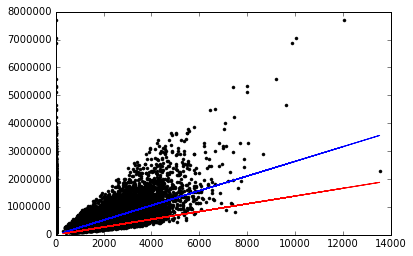

In [37]:
plt.plot(feature_matrix,output,'k.')
plt.plot(feature_matrix,predict_outcome(feature_matrix, weights_0_penalty),'b-')
plt.plot(feature_matrix,predict_outcome(feature_matrix, weights_high_penalty),'r-')

In [40]:
model_features = sales1[['constant','sqft_living', 'sqft_living15']]
my_output =sales1['price']
#(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
#(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)
step_size = 1e-12
max_iterations = 1000
initial_weights = [0.,0.,0.]
simple_weights_0_penalty = 0
simple_weights_high_penalty = 1e11
feature_matrix = np.array(sales1[['constant','sqft_living','sqft_living15']])
output = np.array(sales1['price'])
simple_weights_two = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, simple_weights_high_penalty, max_iterations)

KeyboardInterrupt: 

simple_weights_two